In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import branca.colormap as cmp
import folium
import shapely
import plotly.express as px

In [ ]:
# Canada, Quebec City Dataframe (Main City)
df=pd.read_csv('../data/canada/listings.csv')
# Remove coloumn 'neighbourhood_group' and 'license'  because it's all NaN
df.drop(['neighbourhood_group','license'], axis=1, inplace=True)
# Show the shape
df.shape

In [24]:
# Sample 10 Rows
df.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,298059,Superb cottage Mile-End Plateau !,1536474,Helene,Le Plateau-Mont-Royal,45.52665,-73.60730,Entire home/apt,180,30,52,2014-10-18,0.40,1,104,0
1,2843,Fabulous downtown/airport room,2319,Gail,Le Sud-Ouest,45.48496,-73.58001,Private room,60,30,157,2022-08-21,0.97,2,80,5
2,309367,Charming and Clean ! 5 min Métro,1562348,Virginie,Villeray-Saint-Michel-Parc-Extension,45.55169,-73.60007,Entire home/apt,64,180,22,2015-08-13,0.18,3,74,0
3,29059,Lovely studio Quartier Latin,125031,Maryline,Ville-Marie,45.51939,-73.56482,Entire home/apt,152,2,385,2022-09-02,2.58,2,306,54
4,29061,Maison historique - Quartier Latin,125031,Maryline,Ville-Marie,45.51929,-73.56493,Entire home/apt,286,3,108,2022-08-29,0.84,2,250,27
5,331764,Loft sur le Plateau avec terrasse,1676310,Julien,Le Plateau-Mont-Royal,45.52916,-73.57174,Entire home/apt,45,30,63,2022-08-11,0.52,1,90,2
6,34715,Chez Patrac ! Montreal - Métro Beaubien,149769,Alain,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire home/apt,160,14,8,2022-07-26,0.06,1,117,4
7,344508,Convenient location and comfortable,839115,Nazzarena,LaSalle,45.44160,-73.62942,Private room,33,30,6,2012-10-10,0.05,1,0,0
8,36301,Romantic & peaceful Plateau loft,381468,Sylvie,Le Plateau-Mont-Royal,45.53026,-73.58413,Entire home/apt,160,31,45,2022-08-22,0.51,6,323,3
9,353210,Small room in a wonderful house,1789044,Colin&Özge,Mercier-Hochelaga-Maisonneuve,45.55646,-73.53311,Private room,32,31,26,2022-08-31,0.22,3,255,2


In [25]:
# Sorts neighborhood mean price 
neig=df.groupby(df['neighbourhood']).price.mean()
neigh = neig.sort_values()


<function matplotlib.pyplot.show(close=None, block=None)>

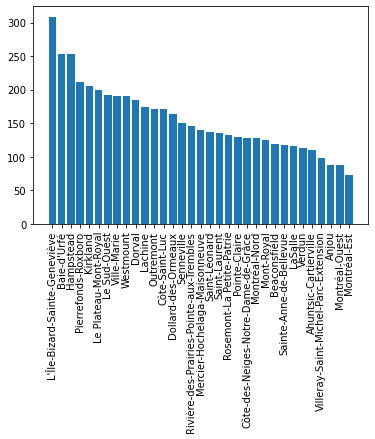

In [8]:
# Bar plot neighborhood mean sorted (draft v2)
plt.bar(*zip(*neig.sort_values(ascending=False).items())) + plt.xticks(rotation=90)
plt.show


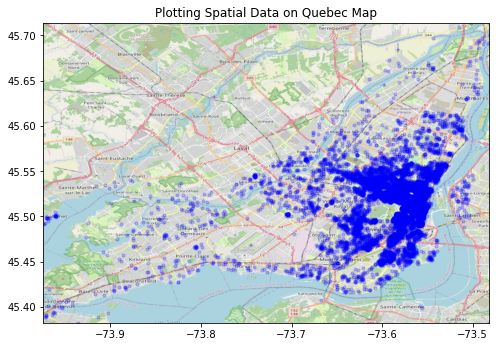

In [13]:
# Set bounds
BBox = ((df.longitude.min(),   df.longitude.max(), df.latitude.min(), df.latitude.max()))
# Import Image
ruh_m = plt.imread('../data/canada/map.png')
# Plot Data on Map (Draft v1)
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Quebec Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')


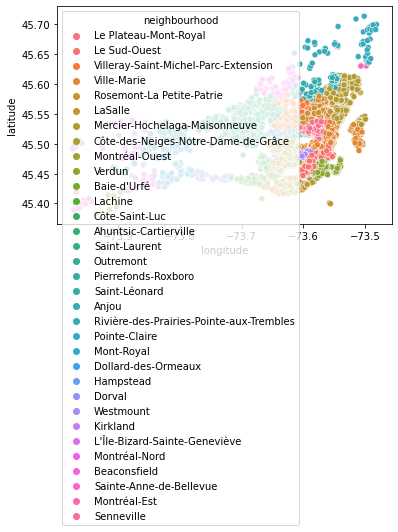

In [23]:
sns.scatterplot(x='longitude',y= 'latitude', hue='neighbourhood',data=df)
ax.set_title('Plotting Spatial Data on Quebec Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

<AxesSubplot:xlabel='room_type', ylabel='price'>

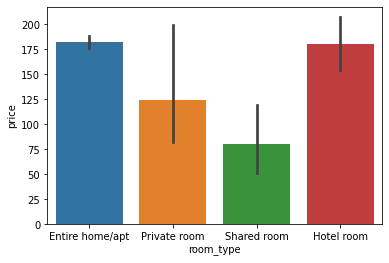

In [28]:
# Bar plot of room types' mean price
sns.barplot(data=df, x='room_type', y='price')

In [ ]:
linear = cmp.LinearColormap(['Blue', 'Red'], vmin = df.price.min(), vmax=df.price.max())

In [ ]:
# Ireland Dataframe
dfIr=pd.read_csv('../data/ireland/listings.csv')

In [ ]:
# Scotland Dataframe
dfSc=pd.read_csv('../data/scotland/listings.csv')

In [ ]:
# Spain Dataframe
dfSp=pd.read_csv('../data/spain/listings.csv')
# Remove coloumn 'neighbourhood_group' because it's all NaN
dfSp.drop(['neighbourhood_group'], axis=1, inplace=True)
# Show the shape
dfSp.shape

In [ ]:
# Switzerland Dataframe
dfSw=pd.read_csv('../data/switzerland/listings.csv')
# Remove coloumn 'neighbourhood_group' because it's all NaN 
dfSw.drop(['neighbourhood_group'], axis=1, inplace=True)
# Show the shape
dfSw.shape

In [ ]:
# Thailand Dataframe
dfTh=pd.read_csv('../data/thailand/listings.csv')
# Remove coloumn 'neighbourhood_group' because it's all NaN 
dfTh.drop(['neighbourhood_group'], axis=1, inplace=True)
# Show the shape
dfTh.shape

In [ ]:
# Turkey Dataframe
dfTu=pd.read_csv('../data/turkey/listings.csv')